In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


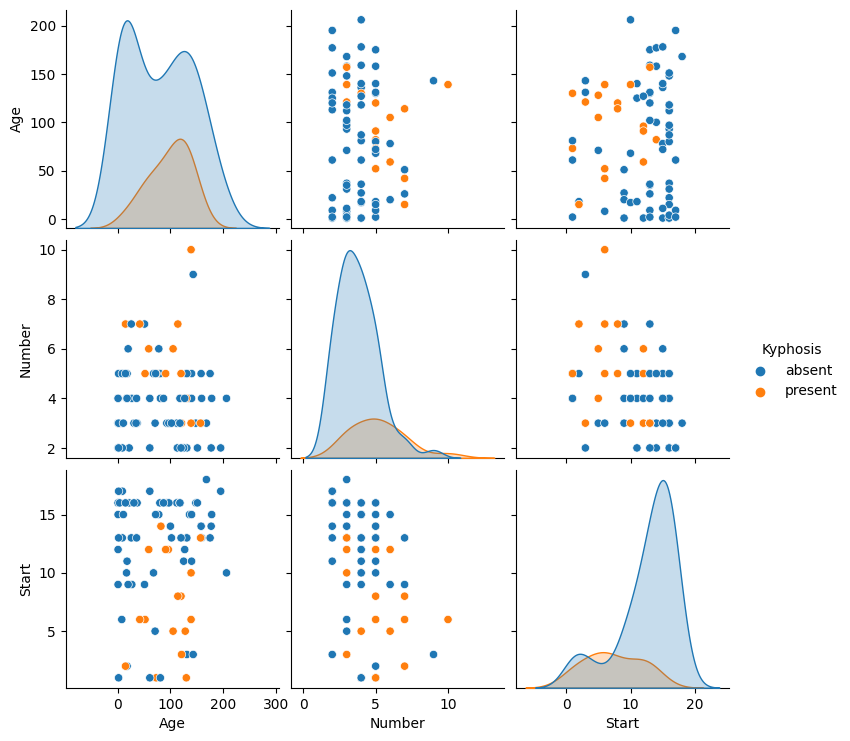

In [49]:
sns.pairplot(df, hue='Kyphosis')

In [50]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [51]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
preds = dt_classifier.predict(X_test)
preds

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent'], dtype=object)

In [55]:
len(df)

81

In [56]:
len(preds)

17

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,preds))
print("\n")
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

      absent       0.92      0.80      0.86        15
     present       0.25      0.50      0.33         2

    accuracy                           0.76        17
   macro avg       0.59      0.65      0.60        17
weighted avg       0.84      0.76      0.80        17



[[12  3]
 [ 1  1]]


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=200)

rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [59]:
rfc_preds = rf_classifier.predict(X_test)
rfc_preds

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent'], dtype=object)

In [60]:
print(classification_report(y_test,rfc_preds))
print("\n")
print(confusion_matrix(y_test,rfc_preds))

              precision    recall  f1-score   support

      absent       0.93      0.87      0.90        15
     present       0.33      0.50      0.40         2

    accuracy                           0.82        17
   macro avg       0.63      0.68      0.65        17
weighted avg       0.86      0.82      0.84        17



[[13  2]
 [ 1  1]]


In [61]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [62]:
# Tree Visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

[Text(0.515625, 0.9375, 'x[2] <= 12.5\ngini = 0.359\nsamples = 64\nvalue = [49, 15]'),
 Text(0.28125, 0.8125, 'x[0] <= 72.0\ngini = 0.499\nsamples = 27\nvalue = [14, 13]'),
 Text(0.125, 0.6875, 'x[1] <= 5.5\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.0625, 0.5625, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.1875, 0.5625, 'x[0] <= 31.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.125, 0.4375, 'x[1] <= 6.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0625, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4375, 0.6875, 'x[1] <= 2.5\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.375, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.5625, 'x[0] <= 172.5\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.4375, 0.4375, 'x[0] <= 86.0\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.31

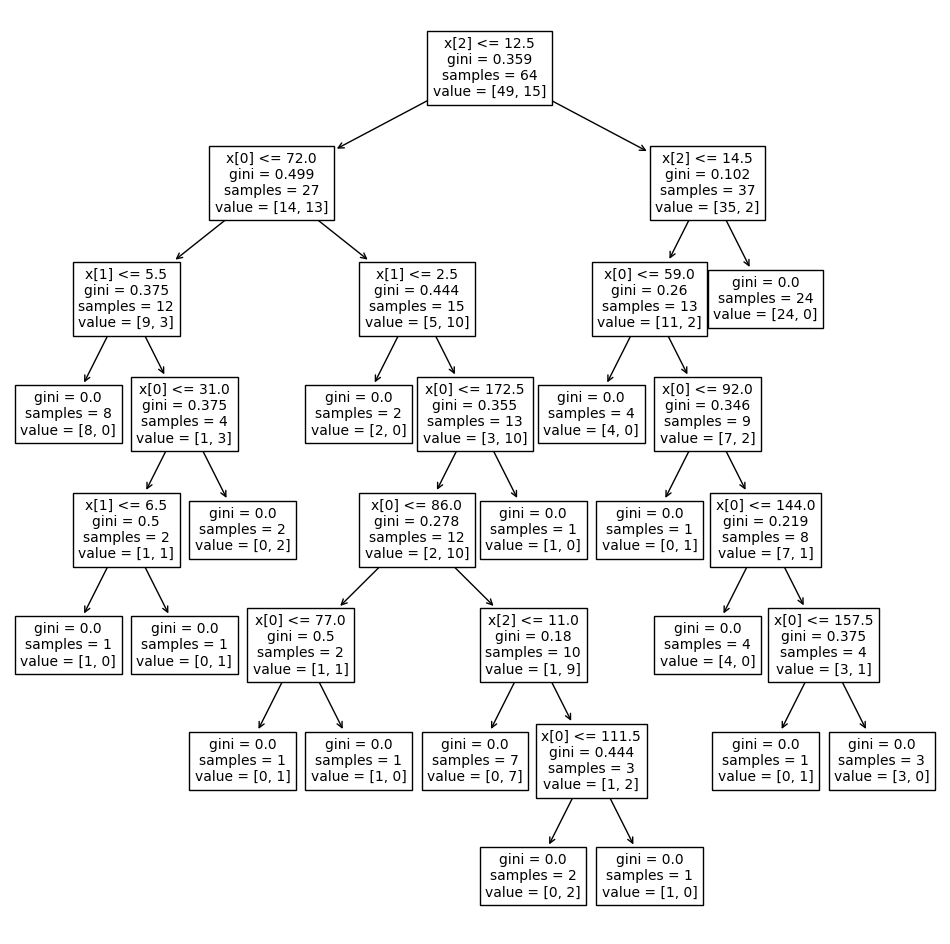

In [65]:
from sklearn import tree 
plt.figure(figsize=(12,12))
tree.plot_tree(dt_classifier,fontsize=10)

In [ ]:
# dot_data = StringIO()  
# export_graphviz(dt_classifier, 
#                 out_file=dot_data,
#                 feature_names=features,
#                 filled=True,rounded=True)

# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph[0].create_png())